<a href="https://colab.research.google.com/github/IndraP24/Full-Stack-Deep-Learning-Spring21/blob/main/Deep%20Learning%20Fundamentals/Part%201%20Basics%20%7C%20Coding%20a%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Fundamentals - Part 1

```
# This is treated as a code block
```
---

# Colab environment

In [1]:
!python --version

Python 3.7.10


In [2]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.29.0        
tensorflow-probability        0.12.1        


In [3]:
!pip list | grep torch

torch                         1.8.1+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.1         
torchvision                   0.9.1+cu101   


In [4]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# Basic Numerical Computing

In [5]:
import numpy as np

# Initialize a numpy ndarray 3 rows , 2 cols
X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [6]:
# By default, ndarrays are float64
X.shape, X.dtype

((3, 2), dtype('float64'))

In [7]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [8]:
# We can set values of a whole colummn
X[:, 0] = 2
X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [9]:
X = np.array([
              [1, 2],
              [3, 4],
              [5, 6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [10]:
x = np.array([10, 20])
print(X.shape, x.shape)

# We can add ndarrays of different dimensions
X + x #Broadcasting

(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [11]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [12]:
# Matrix multiplication

x = np.array([[10, 20], ]).T
result = X @ x # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170]])

## Indexing

In [13]:
X = np.random.rand(3, 2)
X

array([[0.43826162, 0.69699274],
       [0.89954875, 0.18317087],
       [0.53208277, 0.47755719]])

In [14]:
X > 0.5

array([[False,  True],
       [ True, False],
       [ True, False]])

In [15]:
X[X > 0.5] = 1
X

array([[0.43826162, 1.        ],
       [1.        , 0.18317087],
       [1.        , 0.47755719]])

# Basic Plotting

In [16]:
import matplotlib.pyplot as plt
import matplotlib
plt.set_cmap('gray')
matplotlib.rcParams['figure.figsize'] = (12, 8)

<Figure size 432x288 with 0 Axes>

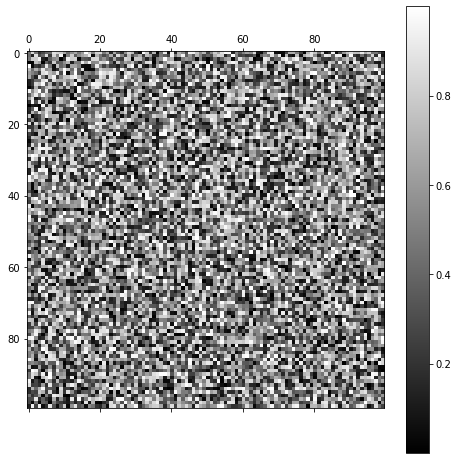

In [17]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

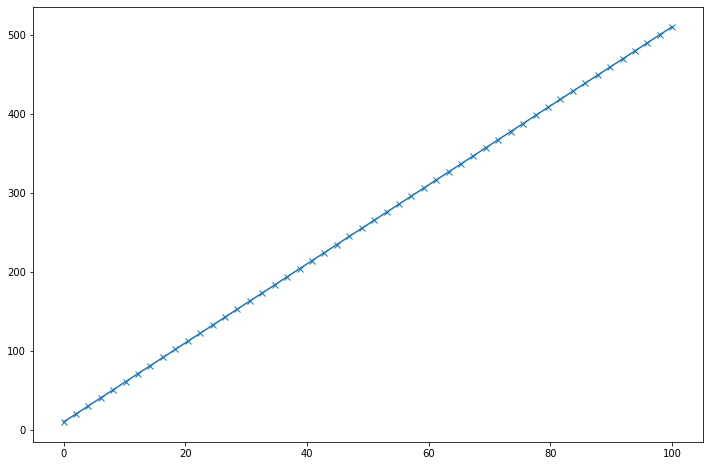

In [18]:
x = np.linspace(0, 100)
y = x * 5 + 10

plt.plot(x, y, 'x-')

# Basic Regression with a linear model

x is 1-dimensional

X: (50, 1), Weights: (1, 1), Bias: (1,), y: (50, 1)


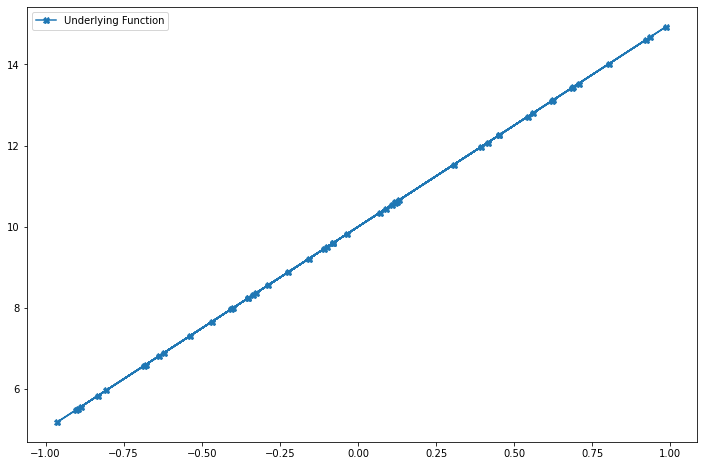

In [19]:
n = 50

d = 1
X = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5], ])
bias_true = np.array([10])

y_true = X @ weights_true + bias_true
print(f'X: {X.shape}, Weights: {weights_true.shape}, Bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(X, y_true, marker='X', label="Underlying Function")
plt.legend()

## Basic Prediction function: Linear

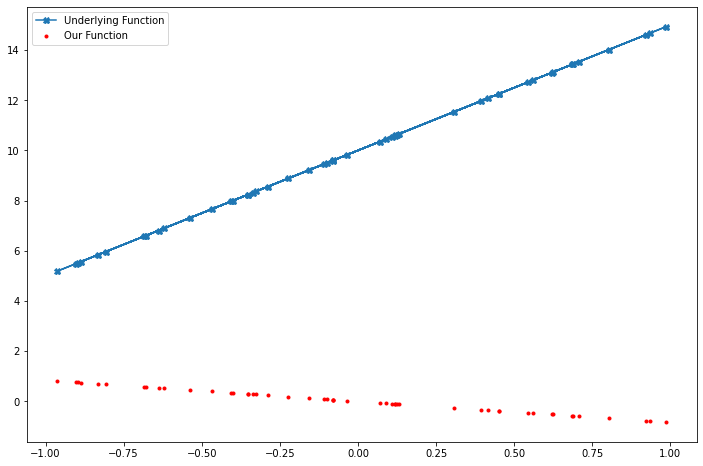

In [20]:
# Initailizing our predictions


class Linear:
    def __init__(self, num_input, num_output=1):
        # The initialization is important to properly deal with different input
        # sizes (otherwise gradients quickly go to 0).
        self.weights = np.random.randn(num_input, num_output) * np.sqrt(2. / num_input)
        self.bias = np.zeros((1))

    def __call__(self, X):
        return X @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(X)
plt.plot(X, y_true, marker="X", label="Underlying Function")
plt.scatter(X, y_pred, color='r', marker='.', label="Our Function")
plt.legend()

## Basic Loss Function: MSE

In [21]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use the Mean Squared Error (MSE), as our loss function.

class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_true - y_pred) ** 2).mean()

loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 106.97072321625365


## Back propagation

In [22]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_pred - y_true) ** 2).mean()

    def backward(self):
        n = self.y_true.shape[0]
        self.gradient = 2. * (self.y_pred - self.y_true) / n
        return self.gradient


class Linear:
    def __init__(self, input_dim: int, num_hidden: int = 1):
        self.weights = np.random.randn(input_dim, num_hidden) - 0.5
        self.bias = np.random.randn(1) - 0.5

    def __call__(self, X):
        self.X = X
        output = X @ self.weights + self.bias
        return output

    # y = w*x + b
    # dy/dx = w
    # dy/dw = X
    # dy/db = 1

    def backward(self, gradient):
        self.weights_gradient = self.X.T @ gradient
        self.bias_gradient = gradient.sum()
        self.X_gradient = gradient @ self.weights.T
        return self.X_gradient

    def update(self, lr):
        self.weights = self.weights - lr * self.weights_gradient
        self.bias = self.bias - lr * self.bias_gradient

In [23]:
# Taking one step forward and one step backward to make sure nothing breaks, 
# and that the loss decreases

loss = MSE()
linear = Linear(d)
y_pred = linear(X)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(X)
print(loss(y_pred, y_true))

89.41299147789447
58.50763479779889


## Train using Gradient Descent

Epoch 0, loss 129.9534841529508
Epoch 5, loss 19.350636211689483
Epoch 10, loss 5.008457142309968
Epoch 15, loss 2.122689596517042
Epoch 20, loss 1.0843398920873304
Epoch 25, loss 0.5791272042742989
Epoch 30, loss 0.31215682657595045
Epoch 35, loss 0.16856568536607366
Epoch 40, loss 0.09105919888349379
Epoch 45, loss 0.04919374320436377
Epoch 50, loss 0.026576766230993067
Epoch 55, loss 0.014358055781455553


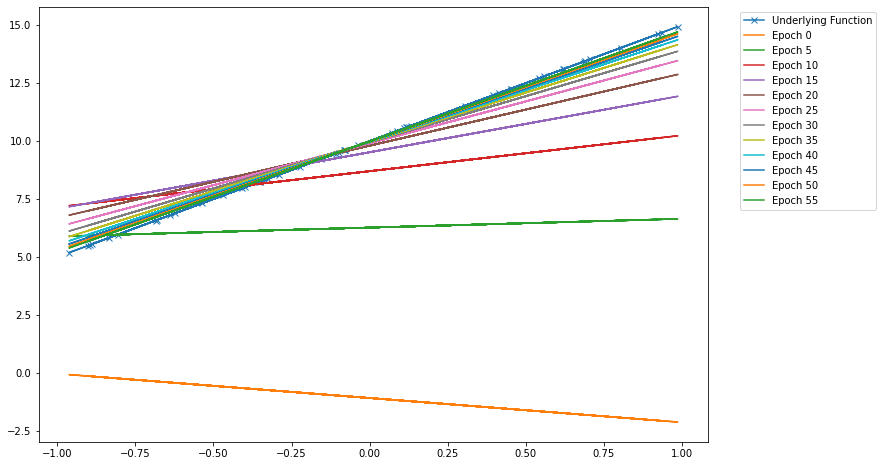

In [24]:
plt.plot(X, y_true, marker='x', label='Underlying Function')

loss = MSE()
linear = Linear(d)

num_epochs = 60
lr = 0.1

for epoch in range(num_epochs):
    y_pred = linear(X)
    loss_value = loss(y_pred, y_true)

    if epoch % 5 == 0:
        print(f'Epoch {epoch}, loss {loss_value}')
        plt.plot(X, y_pred.squeeze(), label=f'Epoch {epoch}')

    gradient_from_loss = loss.backward()
    linear.backward(gradient_from_loss)
    linear.update(lr)

plt.legend(bbox_to_anchor = (1.04, 1), loc="upper left");

## 2-Dimensional Inputs

(100, 2) (2, 1) (1,)
X: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


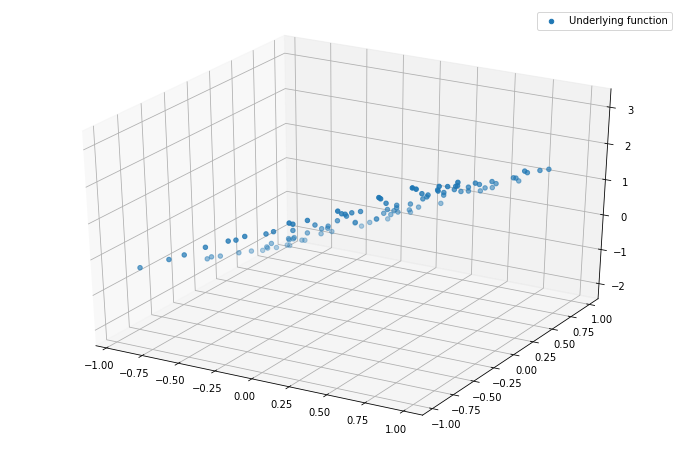

In [25]:
# 100 samples of 2 dimension
n = 100
d = 2
X = np.random.uniform(-1, 1, (n, d))

# y = W * X + b
# y = W_0 * X_0  +  W_1 * X_1  +  b
# y = W @ X + b
 

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(X.shape, weights_true.shape, bias_true.shape)

y_true = X @ weights_true + bias_true
print(f'X: {X.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(X, y, y_pred=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y, label='Underlying function')
    if y_pred is not None:
        ax.scatter(X[:, 0], X[:, 1], y_pred, label='Our function')
    plt.legend()

plot_3d(X, y_true)

3.697494848063401


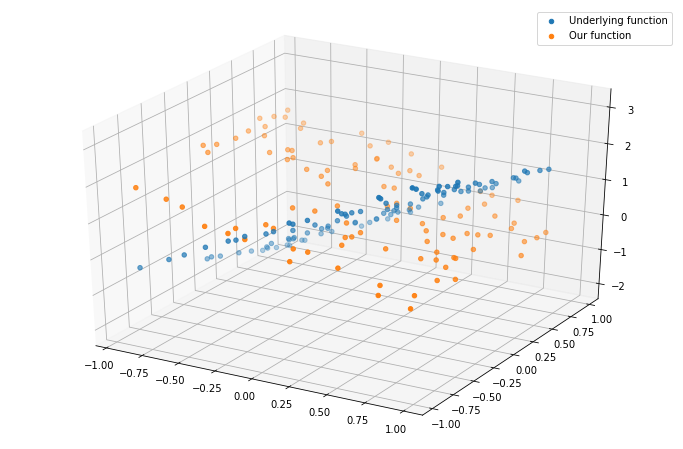

In [26]:
loss = MSE()
linear = Linear(2)
y_pred = linear(X)
print(loss(y_pred, y_true))
fig = plot_3d(X, y_true, y_pred)

Epoch: 0,  loss: 3.697494848063401
Epoch: 1,  loss: 3.189976430136804
Epoch: 2,  loss: 2.759562353511579
Epoch: 3,  loss: 2.392006040223293
Epoch: 4,  loss: 2.076481791438962
Epoch: 5,  loss: 1.804560363272083
Epoch: 6,  loss: 1.5695316620998652
Epoch: 7,  loss: 1.3659504972876126
Epoch: 8,  loss: 1.18932658054005
Epoch: 9,  loss: 1.03590858483103
Epoch: 10,  loss: 0.9025301979178414
Epoch: 11,  loss: 0.7864975927266877
Epoch: 12,  loss: 0.6855050306115484
Epoch: 13,  loss: 0.5975699550359961
Epoch: 14,  loss: 0.5209818960630526
Epoch: 15,  loss: 0.4542614051208833
Epoch: 16,  loss: 0.3961264634857178
Epoch: 17,  loss: 0.3454646025403258
Epoch: 18,  loss: 0.30130949464272627
Epoch: 19,  loss: 0.2628211188913247
Epoch: 20,  loss: 0.22926883869588102
Epoch: 21,  loss: 0.20001688758242242
Epoch: 22,  loss: 0.1745118713902842
Epoch: 23,  loss: 0.15227197515225377
Epoch: 24,  loss: 0.13287762188952124
Epoch: 25,  loss: 0.1159633750312033
Epoch: 26,  loss: 0.10121091057207961
Epoch: 27,  los

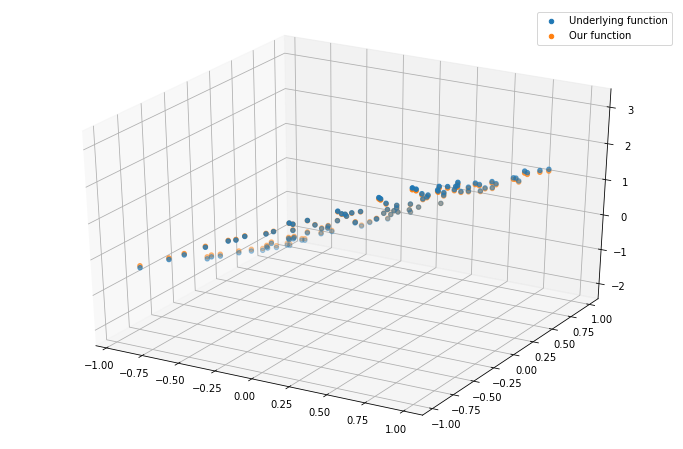

In [27]:
from typing import Callable

def fit(X: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
    for epoch in range(num_epochs):
        y_pred = model(X)
        loss_value = loss(y_pred, y)
        print(f'Epoch: {epoch},  loss: {loss_value}')
        gradient_from_loss = loss.backward()
        model.backward(gradient_from_loss)
        model.update(lr)

fit(X, y_true, model=linear, loss=loss, lr=0.1, num_epochs=60)
plot_3d(X, y_true, linear(X))

# Basic Regression with a Multi-layer Perceptron

So, we now have a way to automatically fit a linear function to N-dimensional data

How can this be made to work with non-linear data

X: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


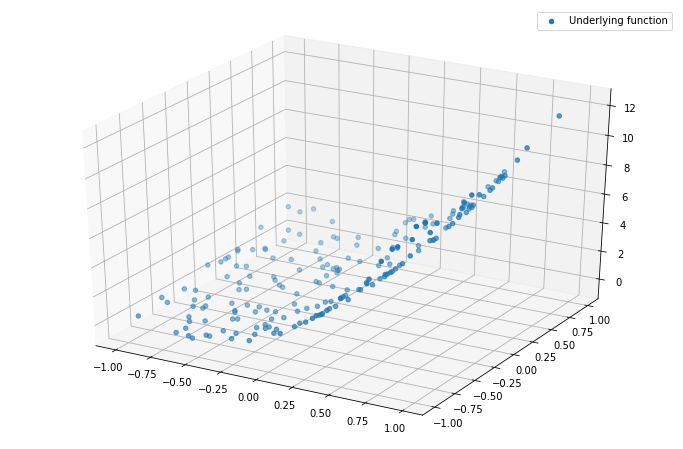

In [56]:
# Make a non-linear data

n = 200
d = 2
X = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([1])

y_true = (X ** 2) @ weights_true + X @ weights_true + bias_true
print(f'X: {X.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(X, y_true)

Epoch: 0,  loss: 28.452348142176913
Epoch: 1,  loss: 21.139195643950963
Epoch: 2,  loss: 16.200652462467144
Epoch: 3,  loss: 12.809401225694574
Epoch: 4,  loss: 10.434238025444637
Epoch: 5,  loss: 8.733060302561002
Epoch: 6,  loss: 7.484658152295379
Epoch: 7,  loss: 6.54522222473254
Epoch: 8,  loss: 5.8205973989514135
Epoch: 9,  loss: 5.2485691435245165
Epoch: 10,  loss: 4.787543945718915
Epoch: 11,  loss: 4.409306207164369
Epoch: 12,  loss: 4.094375246617384
Epoch: 13,  loss: 3.8290217883876823
Epoch: 14,  loss: 3.6033445137527336
Epoch: 15,  loss: 3.4100245705806493
Epoch: 16,  loss: 3.243514365946514
Epoch: 17,  loss: 3.0995051575610204
Epoch: 18,  loss: 2.9745741558293792
Epoch: 19,  loss: 2.865947666537318
Epoch: 20,  loss: 2.7713396423787464
Epoch: 21,  loss: 2.6888395809162864
Epoch: 22,  loss: 2.6168330073786183
Epoch: 23,  loss: 2.553943723790498
Epoch: 24,  loss: 2.4989908083984953
Epoch: 25,  loss: 2.4509557865061997
Epoch: 26,  loss: 2.408956959627176
Epoch: 27,  loss: 2.37

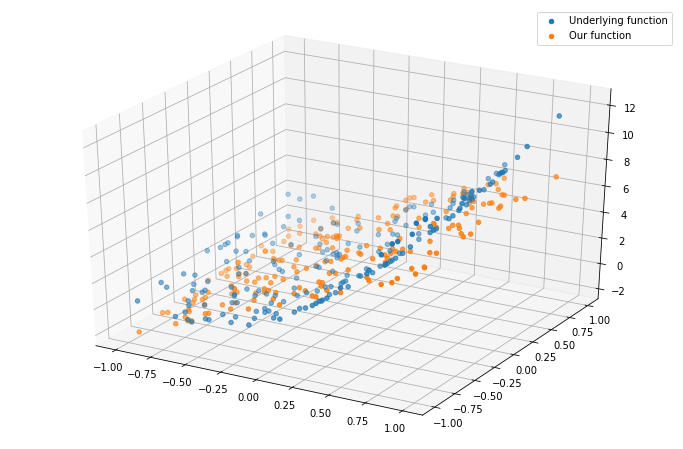

In [57]:
# WE can train just fine, but the final loss will remain high, as our linear function is incapable of representing the data

loss = MSE()
linear = Linear(d)
fit(X, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(X, y_true, linear(X))

## Add non-linearity: ReLU

In [58]:
# In order to learn non-linear functions, we need non-linearities in our model

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output

    def backward(self, output_gradient):
        # import pdb; pdb.set_trace   # For debugging
        self.input_gradient = (self.input_ > 0) * output_gradient
        return self.input_gradient



relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


## Train our new non-linear model

13.901887506403487


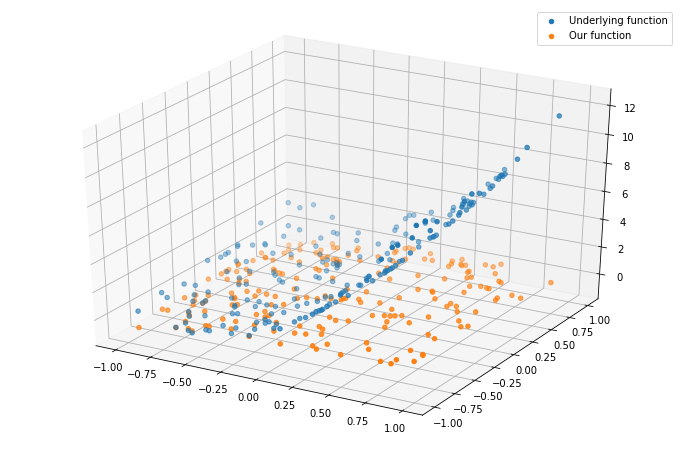

In [59]:
class Model:
    def __init__(self, input_dim, num_hidden):
        self.linear1 = Linear(input_dim, num_hidden)
        self.relu = Relu()
        self.linear2 = Linear(num_hidden, 1)

    def __call__(self, X):
        l1 = self.linear1(X)
        r = self.relu(l1)
        l2 = self.linear2(r)
        return l2

    def backward(self, output_gradient):
        linear2_gradient = self.linear2.backward(output_gradient)
        relu_gradient = self.relu.backward(linear2_gradient)
        linear1_gradient = self.linear1.backward(relu_gradient)
        # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
        # print pdb; pdb.set_trace()
        return linear1_gradient

    def update(self, lr):
        self.linear2.update(lr)
        self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(X)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(X, y_true, y_pred)

In [60]:
loss = MSE()
model = Model(d, 10)
y_pred = model(X)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(X)
loss_value = loss(y_pred, y_true)
print(loss_value)

22.705159073697867
17.811840947668816


Epoch: 0,  loss: 17.811840947668816
Epoch: 1,  loss: 14.750956718372404
Epoch: 2,  loss: 12.797206743431447
Epoch: 3,  loss: 11.522203135570372
Epoch: 4,  loss: 10.662272717652916
Epoch: 5,  loss: 10.049409462579273
Epoch: 6,  loss: 9.567422580970751
Epoch: 7,  loss: 9.137943501881805
Epoch: 8,  loss: 8.688794804766419
Epoch: 9,  loss: 8.123190443566502
Epoch: 10,  loss: 7.29715348379141
Epoch: 11,  loss: 6.184949168364881
Epoch: 12,  loss: 4.753414065335463
Epoch: 13,  loss: 3.243642724643251
Epoch: 14,  loss: 2.060280339871744
Epoch: 15,  loss: 1.4997609620155914
Epoch: 16,  loss: 1.2509549334204788
Epoch: 17,  loss: 1.08837605326003
Epoch: 18,  loss: 0.9684582799833075
Epoch: 19,  loss: 0.8754759738566993
Epoch: 20,  loss: 0.8052369486021239
Epoch: 21,  loss: 0.7505354658943513
Epoch: 22,  loss: 0.7063496471689552
Epoch: 23,  loss: 0.669041516604383
Epoch: 24,  loss: 0.6376725469370864
Epoch: 25,  loss: 0.6107667741344294
Epoch: 26,  loss: 0.5876105797308607
Epoch: 27,  loss: 0.5670

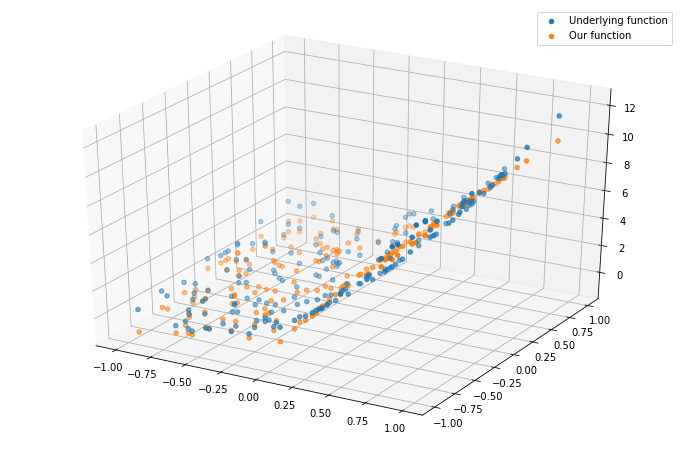

In [61]:
fit(X, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(X, y_true, model(X))